In [335]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.append('/projects/trans_scratch/validations/workspace/szong/Cervical/notebook')
from lineticks import LineTicks


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### new plot 20190329

In [248]:
# gistic cytoband data
cnvdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/'
of = f'{cnvdir}del_cytoband_qvalue_comparison_hiv_pos_vs_neg.csv'
# ndf.to_csv(of, index=False)
ndf = pd.read_csv(of)
ndf.head()
x = ndf['hiv-q(-log10)']
y = ndf['hiv+q(-log10)']
# xband = ndf['']
maxq = int(max(max(x), max(y))) + 2

ndf.shape

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
0,1.043200e-15,2q22.1,LRP1B,0.04368,LOC389033,14.981632,1.359717
1,1.519500e-09,2q36.3,AGXT,1.00000,NaN,8.818299,-0.000000
2,5.958900e-04,3p13,CHMP2B,1.00000,NaN,3.224834,-0.000000
3,1.144100e-02,3p14.2,MAP4,1.00000,NaN,1.941536,-0.000000
4,3.485300e-03,4q21.3,MAPK10,1.00000,NaN,2.457760,-0.000000


(36, 7)

In [217]:
# tmpy = ndf[x==0][['cytoband','hiv-q(-log10)', 'hiv+q(-log10)']].sort_values('hiv+q(-log10)', ascending=False)
# pyxs = tmpy['hiv-q(-log10)']
# pyys = tmpy['hiv+q(-log10)']
# ybands = tmpy['cytoband'].tolist()

In [218]:
# ybands = ndf[x==0][['cytoband','hiv+q(-log10)']].sort_values('hiv+q(-log10)', ascending=False)['cytoband'].tolist()

In [219]:
# tmpx = ndf[y==0][['cytoband','hiv-q(-log10)', 'hiv+q(-log10)']].sort_values('hiv-q(-log10)', ascending=True)
# pxxs = tmpx['hiv-q(-log10)']
# pxys = tmpx['hiv+q(-log10)']
# xbands = tmpx['cytoband'].tolist()

In [220]:
# xbands = ndf[y==0][['cytoband','hiv-q(-log10)']].sort_values('hiv-q(-log10)', ascending=True)['cytoband'].tolist()

### shared bands

In [326]:
def get_data(df):
    x = df['hiv-q(-log10)']
    y = df['hiv+q(-log10)']
    maxq = int(max(max(x), max(y))) + 2
    tmpy = df[x==0][['cytoband','hiv-q(-log10)', 'hiv+q(-log10)']].sort_values('hiv+q(-log10)', ascending=False)
    pyxs = tmpy['hiv-q(-log10)']
    pyys = tmpy['hiv+q(-log10)']
    ybands = tmpy['cytoband'].tolist()
    tmpx = df[y==0][['cytoband','hiv-q(-log10)', 'hiv+q(-log10)']].sort_values('hiv-q(-log10)', ascending=True)
    pxxs = tmpx['hiv-q(-log10)']
    pxys = tmpx['hiv+q(-log10)']
    xbands = tmpx['cytoband'].tolist()
    sbands = df[(x!=0)&(y!=0)]
#     print('xxx', sbands)
    return (x, y, maxq, xbands, ybands, sbands)
    

In [308]:
def label_sbands(bands, ax):
    n = bands.shape[0]
    xs = bands['hiv-q(-log10)'] + 1
    ys = bands['hiv+q(-log10)']
    ls = bands['cytoband']
    # plot shared cytobands
    ax.scatter(xs, ys, marker='o', s=26, c='orange', alpha=1)
    for x, y, l in zip(xs, ys, ls):
        _ = ax.text(x, y, l, rotation=0, withdash=True, 
                    horizontalalignment='left', verticalalignment='center', fontsize=10)

In [224]:
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
# n = len(ybands)
# y = np.linspace(8, 1, n)
# x = np.array(n * [0.95])
# for a, b, c in zip(x, y, ybands):
#     _ = ax.text(a, b, c)
# plt.show()

In [225]:
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 0))  # outward by 10 points
            spine.set_smart_bounds(True)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    if 'right' in spines:
        ax.yaxis.set_ticks_position('right')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    if 'top' in spines:
        ax.xaxis.set_ticks_position('top')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

In [311]:
def label_xband(bands, ax):
    n = len(bands)
    xs = np.linspace(-0.1, 7, n)
    ys = np.array(n * [-0.8])
    for x, y, l in zip(xs, ys, bands):
        _ = ax.text(x, y, l, rotation=-90, withdash=True, verticalalignment='top', fontsize=7)
    return (xs, ys)

In [313]:
def label_yband(bands, ax):
    n = len(bands)
    ys = np.linspace(5, -2, n)
    xs = np.array(n * [-0.8])
    for x, y, l in zip(xs, ys, bands, ):
        _ = ax.text(x, y, l, rotation=-0, withdash=True, 
                    horizontalalignment='right',  fontsize=7)
    return (xs, ys)

In [228]:
def remove_tickline_ticklables(ax):
    _ = plt.setp(ax.get_xticklines(),visible=False)
    _ = plt.setp(ax.get_yticklines(),visible=False)
    _ = plt.setp(ax.get_xticklabels(),visible=False)
    _ = plt.setp(ax.get_yticklabels(),visible=False)

In [327]:
def plot_qvalues(x, y, xlim, ylim, xmtick_range, ymtick_range, sbands,
                 xbands, ybands, title, xlabel, ylabel, ax):

#     ax.scatter(x, y, marker='+', s=26, c='red', alpha=1)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Major ticks every 4, minor ticks every 5
#     major_ticks = mtick_range
    ax.set_xticks(xmtick_range)
    ax.set_yticks(ymtick_range)
    ax.spines['right'].set_visible(False) # turn off right spine
    ax.spines['top'].set_visible(False)
    xlxs, xlys = label_xband(xbands, ax)
    ylxs, ylys = label_yband(ybands, ax)

    # connect points on y axis and labels
    ax.scatter(pyxs, pyys, marker='+', s=26, c='red', alpha=1)
    for px, py, lx, ly in zip(pyxs, pyys, ylxs, ylys):
        _ = ax.plot((px-0.2, lx+0.1), (py, ly), linestyle='dashed', color='gray',linewidth=.8)

    # connect points on x axis and labels
    ax.scatter(pxxs, pxys, marker='+', s=26, c='blue', alpha=1)
    print('xxx', xlxs)
    print(xlys)
    print(pxxs)
    print(pxys)
    for px, py, lx, ly in zip(pxxs, pxys, xlxs, xlys):
        _ = ax.plot((px, lx-0.1), (py-0.2, ly+0.1), linestyle='dashed', color='gray',linewidth=.8)
        
    # label points do not reside on either x or y axis
#     ax.scatter(pyxs, pyys, marker='o', s=26, c='gray', alpha=1)
    _ = label_sbands(sbands, ax)
    _ = ax.set_xlabel(xlabel, fontsize=13)
    _ = ax.set_ylabel(ylabel, fontsize=13)
    _ = ax.set_title(title, fontsize=16)

### plot all 4 comparisons

In [289]:
# gistic cytoband data
# cnvdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/'
# of = f'{cnvdir}amp_cytoband_qvalue_comparison_hiv_pos_vs_neg.csv'
# # ndf.to_csv(of, index=False)
# ampdf = pd.read_csv(of)
# ampdf.head()


In [332]:
cnvdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/'
of = f'{cnvdir}amps_cytoband_qvalue_comparison_hiv_pos_vs_neg.csv'
htmcp_amps = pd.read_csv(of)
htmcp_amps.head(2)
of = f'{cnvdir}dels_cytoband_qvalue_comparison_hiv_pos_vs_neg.csv'
htmcp_dels = pd.read_csv(of)
htmcp_dels.head(2)

of = f'{cnvdir}amps_cytoband_qvalue_comparison_tcga_vs_neg.csv'
tcga_amps = pd.read_csv(of)

of = f'{cnvdir}dels_cytoband_qvalue_comparison_tcga_vs_neg.csv'
tcga_dels = pd.read_csv(of)

,cytoband,q_value_hiv+,oncogenes_hiv+,num_genes_hiv+,q_value_hiv-,oncogenes_hiv-,num_genes_hiv-,hiv+q(-log10),hiv-q(-log10)
0,11q22.1,3.544700e-09,"BIRC3,YAP1",7.0,0.001928,"BIRC3,YAP1",21.0,8.450421,2.714915
1,8q24.21,1.045400e-04,NaN,0.0,1.000000,NaN,NaN,3.980718,-0.000000


,cytoband,q_value_hiv+,oncogenes_hiv+,num_genes_hiv+,q_value_hiv-,oncogenes_hiv-,num_genes_hiv-,hiv+q(-log10),hiv-q(-log10)
0,2q22.1,1.043200e-15,LRP1B,2.0,0.04368,LRP1B,77.0,14.981632,1.359717
1,2q36.3,1.519500e-09,"IGFBP5,MIR375,MIR26B,CREB1,SP100,ING5,ACSL3,PA...",335.0,1.00000,NaN,NaN,8.818299,-0.000000


In [333]:
 get_data(htmcp_amps)

(0     2.714915
 1    -0.000000
 2    -0.000000
 3    -0.000000
 4    -0.000000
 5    -0.000000
 6     2.729065
 7    -0.000000
 8    -0.000000
 9    -0.000000
 10   -0.000000
 11   -0.000000
 12    2.049879
 13    1.386285
 14    1.286467
 15    0.929667
 16    0.863850
 Name: hiv-q(-log10), dtype: float64, 0     8.450421
 1     3.980718
 2     3.849551
 3     2.402864
 4     2.228420
 5     1.808214
 6     1.808214
 7     1.684786
 8     1.194880
 9     1.120612
 10    0.911899
 11    0.754907
 12   -0.000000
 13   -0.000000
 14   -0.000000
 15   -0.000000
 16   -0.000000
 Name: hiv+q(-log10), dtype: float64, 10, ['19q13.43',
  '2p24.3',
  '15q26.1',
  '8q24.22',
  '1q21.3'], ['8q24.21',
  '18p11.31',
  '2q31.1',
  '11p13',
  '1p32.1',
  '2p11.2',
  '13q22.1',
  '20q11.21',
  '17q12',
  '21q22.2'],   cytoband  q_value_hiv+ oncogenes_hiv+  num_genes_hiv+  q_value_hiv-  \
 0  11q22.1  3.544700e-09     BIRC3,YAP1             7.0      0.001928   
 6     3q28  1.555200e-02           TP63 

In [334]:
 get_data(htmcp_dels)

(0     1.359717
 1    -0.000000
 2    -0.000000
 3     3.293564
 4    -0.000000
 5    -0.000000
 6    -0.000000
 7     3.293564
 8    -0.000000
 9    -0.000000
 10   -0.000000
 11   -0.000000
 12    0.850258
 13   -0.000000
 14   -0.000000
 15   -0.000000
 16   -0.000000
 17   -0.000000
 18   -0.000000
 19   -0.000000
 20    3.293564
 21    3.293564
 22    3.293564
 23    3.293564
 24    1.704917
 25    1.313632
 26    1.467717
 27    1.115896
 28    1.947768
 29    1.442288
 30    0.878539
 31    0.965973
 32    0.850258
 33    0.769296
 34    0.769296
 35    0.700732
 Name: hiv-q(-log10), dtype: float64, 0     14.981632
 1      8.818299
 2      4.554022
 3      6.220981
 4      3.075628
 5      2.457760
 6      1.747705
 7      2.505122
 8      1.601088
 9      1.480001
 10     3.224834
 11     3.026346
 12     2.125228
 13     2.162273
 14     1.506751
 15     1.941536
 16     0.942714
 17     0.850012
 18     2.192627
 19     0.644434
 20    -0.000000
 21    -0.000000
 22    -0.000

xxx [-0.1    1.675  3.45   5.225  7.   ]
[-0.8 -0.8 -0.8 -0.8 -0.8]
28    0.700732
23    0.769296
29    0.769296
21    0.850258
35    0.878539
33    0.965973
27    1.115896
34    1.313632
20    1.442288
26    1.467717
25    1.704917
30    1.947768
22    3.293564
24    3.293564
31    3.293564
32    3.293564
Name: hiv-q(-log10), dtype: float64
28   -0.0
23   -0.0
29   -0.0
21   -0.0
35   -0.0
33   -0.0
27   -0.0
34   -0.0
20   -0.0
26   -0.0
25   -0.0
30   -0.0
22   -0.0
24   -0.0
31   -0.0
32   -0.0
Name: hiv+q(-log10), dtype: float64
xxx [-0.1         0.37333333  0.84666667  1.32        1.79333333  2.26666667
  2.74        3.21333333  3.68666667  4.16        4.63333333  5.10666667
  5.58        6.05333333  6.52666667  7.        ]
[-0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8 -0.8
 -0.8 -0.8]
28    0.700732
23    0.769296
29    0.769296
21    0.850258
35    0.878539
33    0.965973
27    1.115896
34    1.313632
20    1.442288
26    1.467717
25    1.704917
30    1.9477

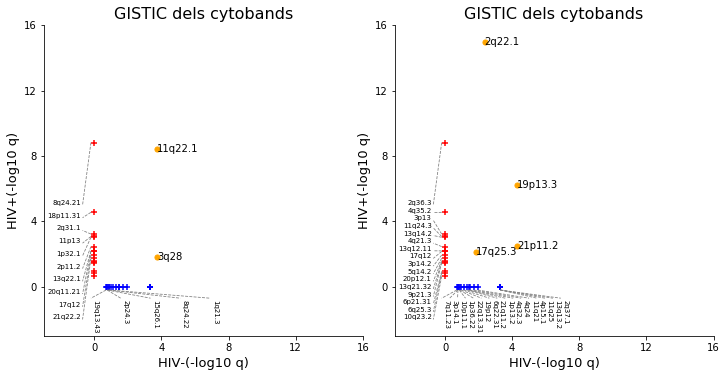

In [331]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(12, 12))
grid = plt.GridSpec(2, 2, hspace=0.1, wspace=0.1, 
                    width_ratios=[1,1], 
                    height_ratios=[1,1])

ax0 = plt.subplot(grid[0])
x, y, maxq, xbands, ybands, sbands = get_data(htmcp_amps)
# pot amp hiv+ vs -
xlim = (-3, maxq)
ylim = (-3, maxq)
xmtick_range = np.arange(0, 20, 4)
ymtick_range = np.arange(0, 20, 4)

title = 'GISTIC dels cytobands'
xlabel = 'HIV-(-log10 q)'
ylabel = 'HIV+(-log10 q)'
plot_qvalues(x, y, xlim, ylim, xmtick_range, ymtick_range,
             sbands, xbands, ybands, title, 
             xlabel, ylabel, ax0)

# pot del hiv+ vs -


ax1 = plt.subplot(grid[1])
x, y, maxq, xbands, ybands, sbands = get_data(htmcp_dels)
xlim = (-3, maxq)
ylim = (-3, maxq)
plot_qvalues(x, y, xlim, ylim, xmtick_range, ymtick_range,
             sbands, xbands, ybands, title, 
             xlabel, ylabel, ax1)

# # pot amp tcga vs hiv-


# print('plot amp tcga vs hiv-')
# ax2 = plt.subplot(grid[2])
# x, y, maxq, xbands, ybands, sbands = get_data(tcga_amps)
# xlim = (-3, maxq)
# ylim = (-3, maxq)
# plot_qvalues(x, y, xlim, ylim, xmtick_range, ymtick_range,
#              sbands, xbands, ybands, title, 
#              xlabel, ylabel, ax2)

# ax3 = plt.subplot(grid[3])
# x, y, maxq, xbands, ybands, sbands = get_data(tcga_dels)
# xlim = (-3, maxq)
# ylim = (-3, maxq)
# plot_qvalues(x, y, xlim, ylim, xmtick_range, ymtick_range,
#              sbands, xbands, ybands, title, 
#              xlabel, ylabel, ax3)

In [325]:
tcga_amps.shape

(18, 9)

In [324]:
tcga_amps[tcga_amps['hiv+q(-log10)']==0]

,cytoband,q_value_hiv+,oncogenes_hiv+,num_genes_hiv+,q_value_hiv-,oncogenes_hiv-,num_genes_hiv-,hiv+q(-log10),hiv-q(-log10)
13,1q21.3,1.0,NaN,NaN,0.008915,"PLEKHO1,BCL9,RAB25,AIM2,NOTCH2,NTRK1,PDE4DIP,M...",396.0,-0.0,2.049879
14,8q24.22,1.0,NaN,NaN,0.041088,"KLF10,MTSS1,EXT1,FBXO32,SCRIB,NDRG1,MAFA,MYC,C...",278.0,-0.0,1.386285
15,15q26.1,1.0,NaN,NaN,0.051705,"NTRK3,BLM,CRTC3,FES,IDH2",69.0,-0.0,1.286467
16,2p24.3,1.0,NaN,NaN,0.117580,"NCOA1,MYCN,ALK,SOX11,RHOB,C2orf44,DNMT3A",206.0,-0.0,0.929667
17,19q13.43,1.0,NaN,NaN,0.136820,"GLTSCR1,ZNF331,KLK2,CIC,MIRLET7E,TGFB1,ERCC2,A...",777.0,-0.0,0.863850


(-3, 16)

(-3, 16)

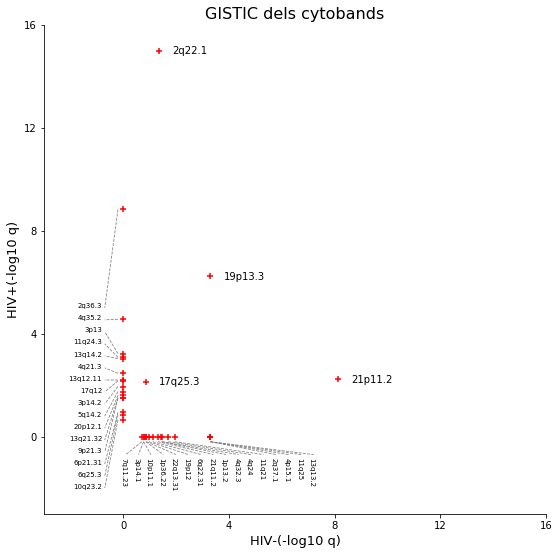

In [255]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(9, 9))
# grid = plt.GridSpec(2, 2, hspace=0.05, wspace=0.05, 
#                     width_ratios=[1,3], 
#                     height_ratios=[3,1])


ax1 = fig.add_subplot(111)


# scatter points on the main axes
ax1.scatter(x, y, marker='+', s=26, c='red', alpha=1)

# adjust_spines(ax1, ['top', 'right'])
ax1.set_xlim(-3, maxq)
ax1.set_ylim(-3, maxq)


# Major ticks every 4, minor ticks every 5
major_ticks = np.arange(0, 17, 4)
# minor_ticks = np.arange(0, 101, 5)

ax1.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)
ax1.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)

# ax1.tick_params(direction='in', length=6, width=2, colors='black',
#                grid_color='black', grid_alpha=0.5, grid_linewidth=4 )
# ax1.set_xticklines(np.linspace(0,16,5))
# ax1.set_xticklabels(np.linspace(0,16,5))

ax1.spines['right'].set_visible(False) # turn off right spine
ax1.spines['top'].set_visible(False)



# ax0 = fig.add_subplot(grid[0],  xticklabels=[], sharey=ax1, frameon=False)
# remove_tickline_ticklables(ax0)




# ax3 = fig.add_subplot(grid[3], yticklabels=[], sharex=ax1, frameon=False)



# ax2 = fig.add_subplot(grid[2], frameon=False)
# ax2.text(.5, .5,'HIV+/- Deletion')
# remove_tickline_ticklables(ax2)




# histogram on the attached axes
# ax3.text(.2,.95, 'hiv-cytoband', rotation=-90, withdash=True, verticalalignment='top', fontsize=14)
xlxs, xlys = label_xband(xbands, ax1)
# ax3.invert_yaxis()
remove_tickline_ticklables(ax3)


# ax0.text(.95,.5, 'hiv+ cytoband', rotation=-0, withdash=True, horizontalalignment='right', fontsize=14)
ylxs, ylys = label_yband(ybands, ax1)

# connect points and labels
for px, py, lx, ly in zip(pyxs, pyys, ylxs, ylys):
    _ = ax1.plot((px-0.2, lx+0.1), (py, ly), linestyle='dashed', color='gray',linewidth=.8)

# connect points and labels
for px, py, lx, ly in zip(pxxs, pxys, xlxs, xlys):
    _ = ax1.plot((px, lx+0.2), (py-0.2, ly+0.1), linestyle='dashed', color='gray',linewidth=.8)

_ = plot_shared_bands(sbands, ax1)

_ = ax1.set_xlabel('HIV-(-log10 q)', fontsize=13)
_ = ax1.set_ylabel('HIV+(-log10 q)', fontsize=13)
_ = ax1.set_title('GISTIC dels cytobands', fontsize=16)
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/cytoband_q_comparison.png'
plt.savefig(of, bbox_inches='tight', dpi=200)

In [247]:
len(x)
len(y)

1000

36

[[<matplotlib.lines.Line2D at 0x7f6981ff53c8>],

[[<matplotlib.lines.Line2D at 0x7f6981f84780>],

Text(0.5,0,'time')

Text(0,0.5,'value')

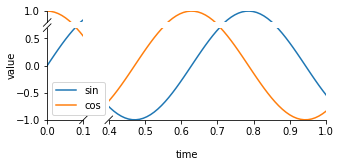

In [236]:
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(5,2))
bax = brokenaxes(xlims=((0, .1), (.4, 1)), ylims=((-1, .7), (.79, 1)), hspace=.1)
x = np.linspace(0, 1, 100)
bax.plot(x, np.sin(10 * x), label='sin')
bax.plot(x, np.cos(10 * x), label='cos')
bax.legend(loc=3)
bax.set_xlabel('time')
bax.set_ylabel('value')

[[<matplotlib.lines.Line2D at 0x7f69818f2c88>],

[(array([195., 234., 227., 260.,  47.,  24.,  12.,   0.,   0.,   1.]),
  array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
  <a list of 10 Patch objects>),
 (array([195., 234., 227., 260.,  47.,  24.,  12.,   0.,   0.,   1.]),
  array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
  <a list of 10 Patch objects>)]

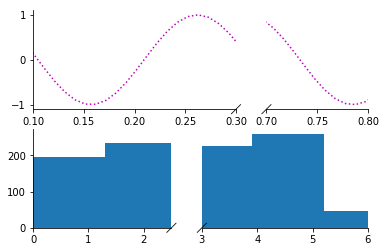

In [241]:
sps1, sps2 = GridSpec(2,1)

bax = brokenaxes(xlims=((.1, .3),(.7, .8)), subplot_spec=sps1,  hspace=.02)
x = np.linspace(0, 1, 100)
bax.plot(x, np.sin(x*30), ls=':', color='m')

x = np.random.poisson(3, 1000)
bax = brokenaxes(xlims=((0, 2.5), (3, 6)), subplot_spec=sps2, hspace=.01)
bax.hist(x, histtype='bar')

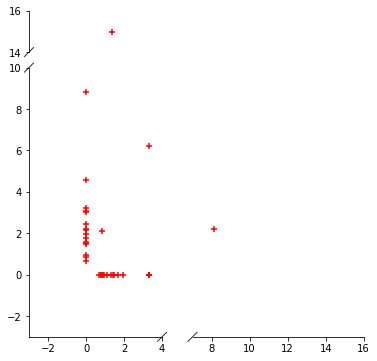

In [254]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
# grid = plt.GridSpec(2, 2, hspace=0.05, wspace=0.05, 
#                     width_ratios=[1,3], 
#                     height_ratios=[3,1])


# ax1 = fig.add_subplot(111)
# broke y axis
ax1 = brokenaxes(xlims=((-3, 4), (7, maxq)), ylims=((-3, 10), (14, maxq)), hspace=.1)

# scatter points on the main axes
ax1.scatter(x, y, marker='+', s=26, c='red', alpha=1)

# # adjust_spines(ax1, ['top', 'right'])
# ax1.set_xlim(-3, maxq)
# ax1.set_ylim(-3, maxq)


# # Major ticks every 4, minor ticks every 5
# major_ticks = np.arange(0, 17, 4)
# # minor_ticks = np.arange(0, 101, 5)

# ax1.set_xticks(major_ticks)
# # ax.set_xticks(minor_ticks, minor=True)
# ax1.set_yticks(major_ticks)
# # ax.set_yticks(minor_ticks, minor=True)

# # ax1.tick_params(direction='in', length=6, width=2, colors='black',
# #                grid_color='black', grid_alpha=0.5, grid_linewidth=4 )
# # ax1.set_xticklines(np.linspace(0,16,5))
# # ax1.set_xticklabels(np.linspace(0,16,5))

# ax1.spines['right'].set_visible(False) # turn off right spine
# ax1.spines['top'].set_visible(False)



# # ax0 = fig.add_subplot(grid[0],  xticklabels=[], sharey=ax1, frameon=False)
# # remove_tickline_ticklables(ax0)




# # ax3 = fig.add_subplot(grid[3], yticklabels=[], sharex=ax1, frameon=False)



# # ax2 = fig.add_subplot(grid[2], frameon=False)
# # ax2.text(.5, .5,'HIV+/- Deletion')
# # remove_tickline_ticklables(ax2)




# # histogram on the attached axes
# # ax3.text(.2,.95, 'hiv-cytoband', rotation=-90, withdash=True, verticalalignment='top', fontsize=14)
# xlxs, xlys = label_xband(xbands, ax1)
# # ax3.invert_yaxis()
# remove_tickline_ticklables(ax3)


# # ax0.text(.95,.5, 'hiv+ cytoband', rotation=-0, withdash=True, horizontalalignment='right', fontsize=14)
# ylxs, ylys = label_yband(ybands, ax1)

# # connect points and labels
# for px, py, lx, ly in zip(pyxs, pyys, ylxs, ylys):
#     _ = ax1.plot((px-0.2, lx+0.1), (py, ly), linestyle='dashed', color='gray',linewidth=.8)

# # connect points and labels
# for px, py, lx, ly in zip(pxxs, pxys, xlxs, xlys):
#     _ = ax1.plot((px, lx+0.2), (py-0.2, ly+0.1), linestyle='dashed', color='gray',linewidth=.8)

# _ = plot_shared_bands(sbands, ax1)

# _ = ax1.set_xlabel('HIV-(-log10 q)', fontsize=13)
# _ = ax1.set_ylabel('HIV+(-log10 q)', fontsize=13)
# _ = ax1.set_title('GISTIC dels cytobands', fontsize=16)
# of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/cytoband_q_comparison.png'
# plt.savefig(of, bbox_inches='tight', dpi=200)